Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the theme for Seaborn and Matplotlib plots
sns.set_theme(style="darkgrid")  # This will provide a similar grid and tick style
plt.rcParams['axes.facecolor'] = '#2d2d2d'  # Background color similar to Monokai theme
plt.rcParams['axes.edgecolor'] = '#ffffff'
plt.rcParams['xtick.color'] = '#ffffff'
plt.rcParams['ytick.color'] = '#ffffff'
plt.rcParams['text.color'] = '#ffffff'
plt.rcParams['axes.labelcolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#2d2d2d'  # Figure background color
plt.rcParams['grid.color'] = '#444444'

In [3]:
insurance_df = pd.read_csv('/content/insurance.csv')

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Task 2 EDA

In [6]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<Axes: >

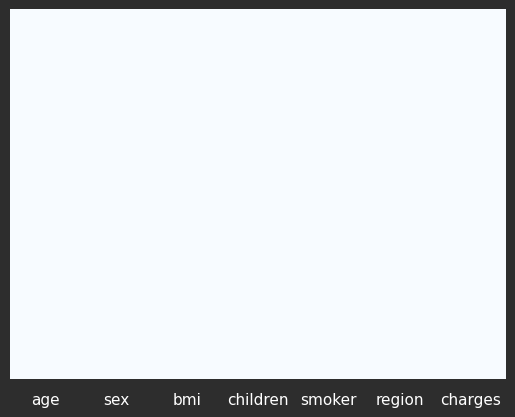

In [8]:
sns.heatmap(insurance_df.isnull(),cbar=False, yticklabels=False, cmap='Blues')

In [9]:
#dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#group by region
df_region = insurance_df.groupby(by = 'region').count()
df_region

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [12]:
# Group by region and compute the mean for numeric columns only
df_region = insurance_df.groupby(by='region').mean(numeric_only=True)
df_region


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Practice Opportunity
Group Data by Age and Charge and find their relation.


In [13]:
insurance_df.groupby( 'age').mean(numeric_only=True)
#df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


Task 3 Perform Feature Engineering

In [14]:
#check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
#converting categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].map({'female': 0, 'male': 1})

In [16]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


Convert categorical variable to numerical


In [17]:
print(insurance_df.dtypes)


age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [18]:


# Convert the 'smoker' column to string type to handle the 'yes'/'no' values
insurance_df['smoker'] = insurance_df['smoker'].astype(str)


In [19]:
print(insurance_df.dtypes)

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [20]:
# Convert the 'smoker' column values directly using a mapping dictionary
insurance_df['smoker'] = insurance_df['smoker'].map({'no': 0, 'yes': 1})

In [21]:
# Apply lambda function to convert 'yes' -> 1 and 'no' -> 0
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)


In [22]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [23]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
# Create dummy variables for the 'region' column, dropping the first category
region_dummies = pd.get_dummies(insurance_df['region'], drop_first=True).astype(int)

# Display the dummy variables (now as 0 and 1)
print(region_dummies)

# Optional: Add these dummy variables to the original dataframe
insurance_df = pd.concat([insurance_df, region_dummies], axis=1)

# Display the updated DataFrame
print(insurance_df)

      northwest  southeast  southwest
0             0          0          1
1             0          1          0
2             0          1          0
3             1          0          0
4             1          0          0
...         ...        ...        ...
1333          1          0          0
1334          0          0          0
1335          0          1          0
1336          0          0          1
1337          1          0          0

[1338 rows x 3 columns]
      age  sex     bmi  children  smoker     region      charges  northwest  \
0      19    0  27.900         0       0  southwest  16884.92400          0   
1      18    1  33.770         1       0  southeast   1725.55230          0   
2      28    1  33.000         3       0  southeast   4449.46200          0   
3      33    1  22.705         0       0  northwest  21984.47061          1   
4      32    1  28.880         0       0  northwest   3866.85520          1   
...   ...  ...     ...       ...     ...     

In [25]:
insurance_df.drop(['region'] , axis = 1 , inplace = True)

In [26]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,0,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


Task 4 Data Visualisation

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

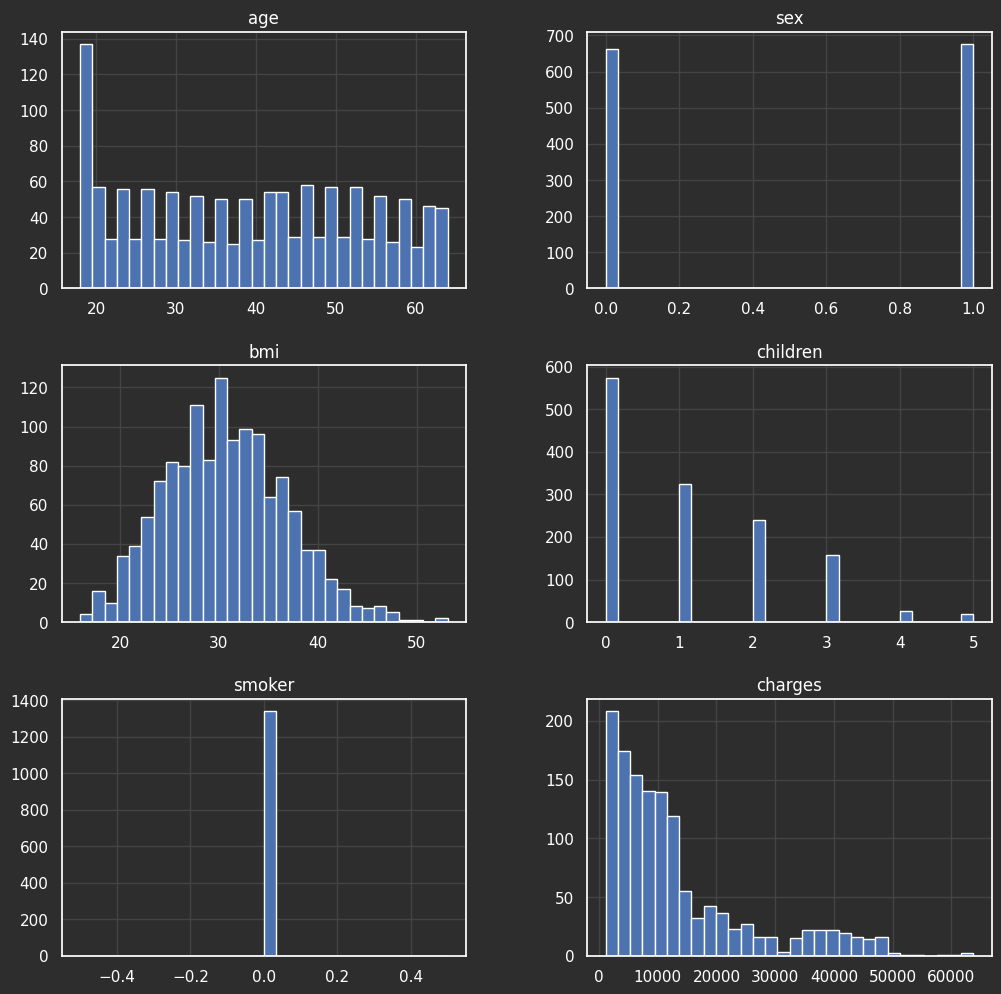

In [27]:
insurance_df[['age', 'sex' , 'bmi' , 'children' , 'smoker' , 'charges']].hist(figsize=(12,12), bins=30)

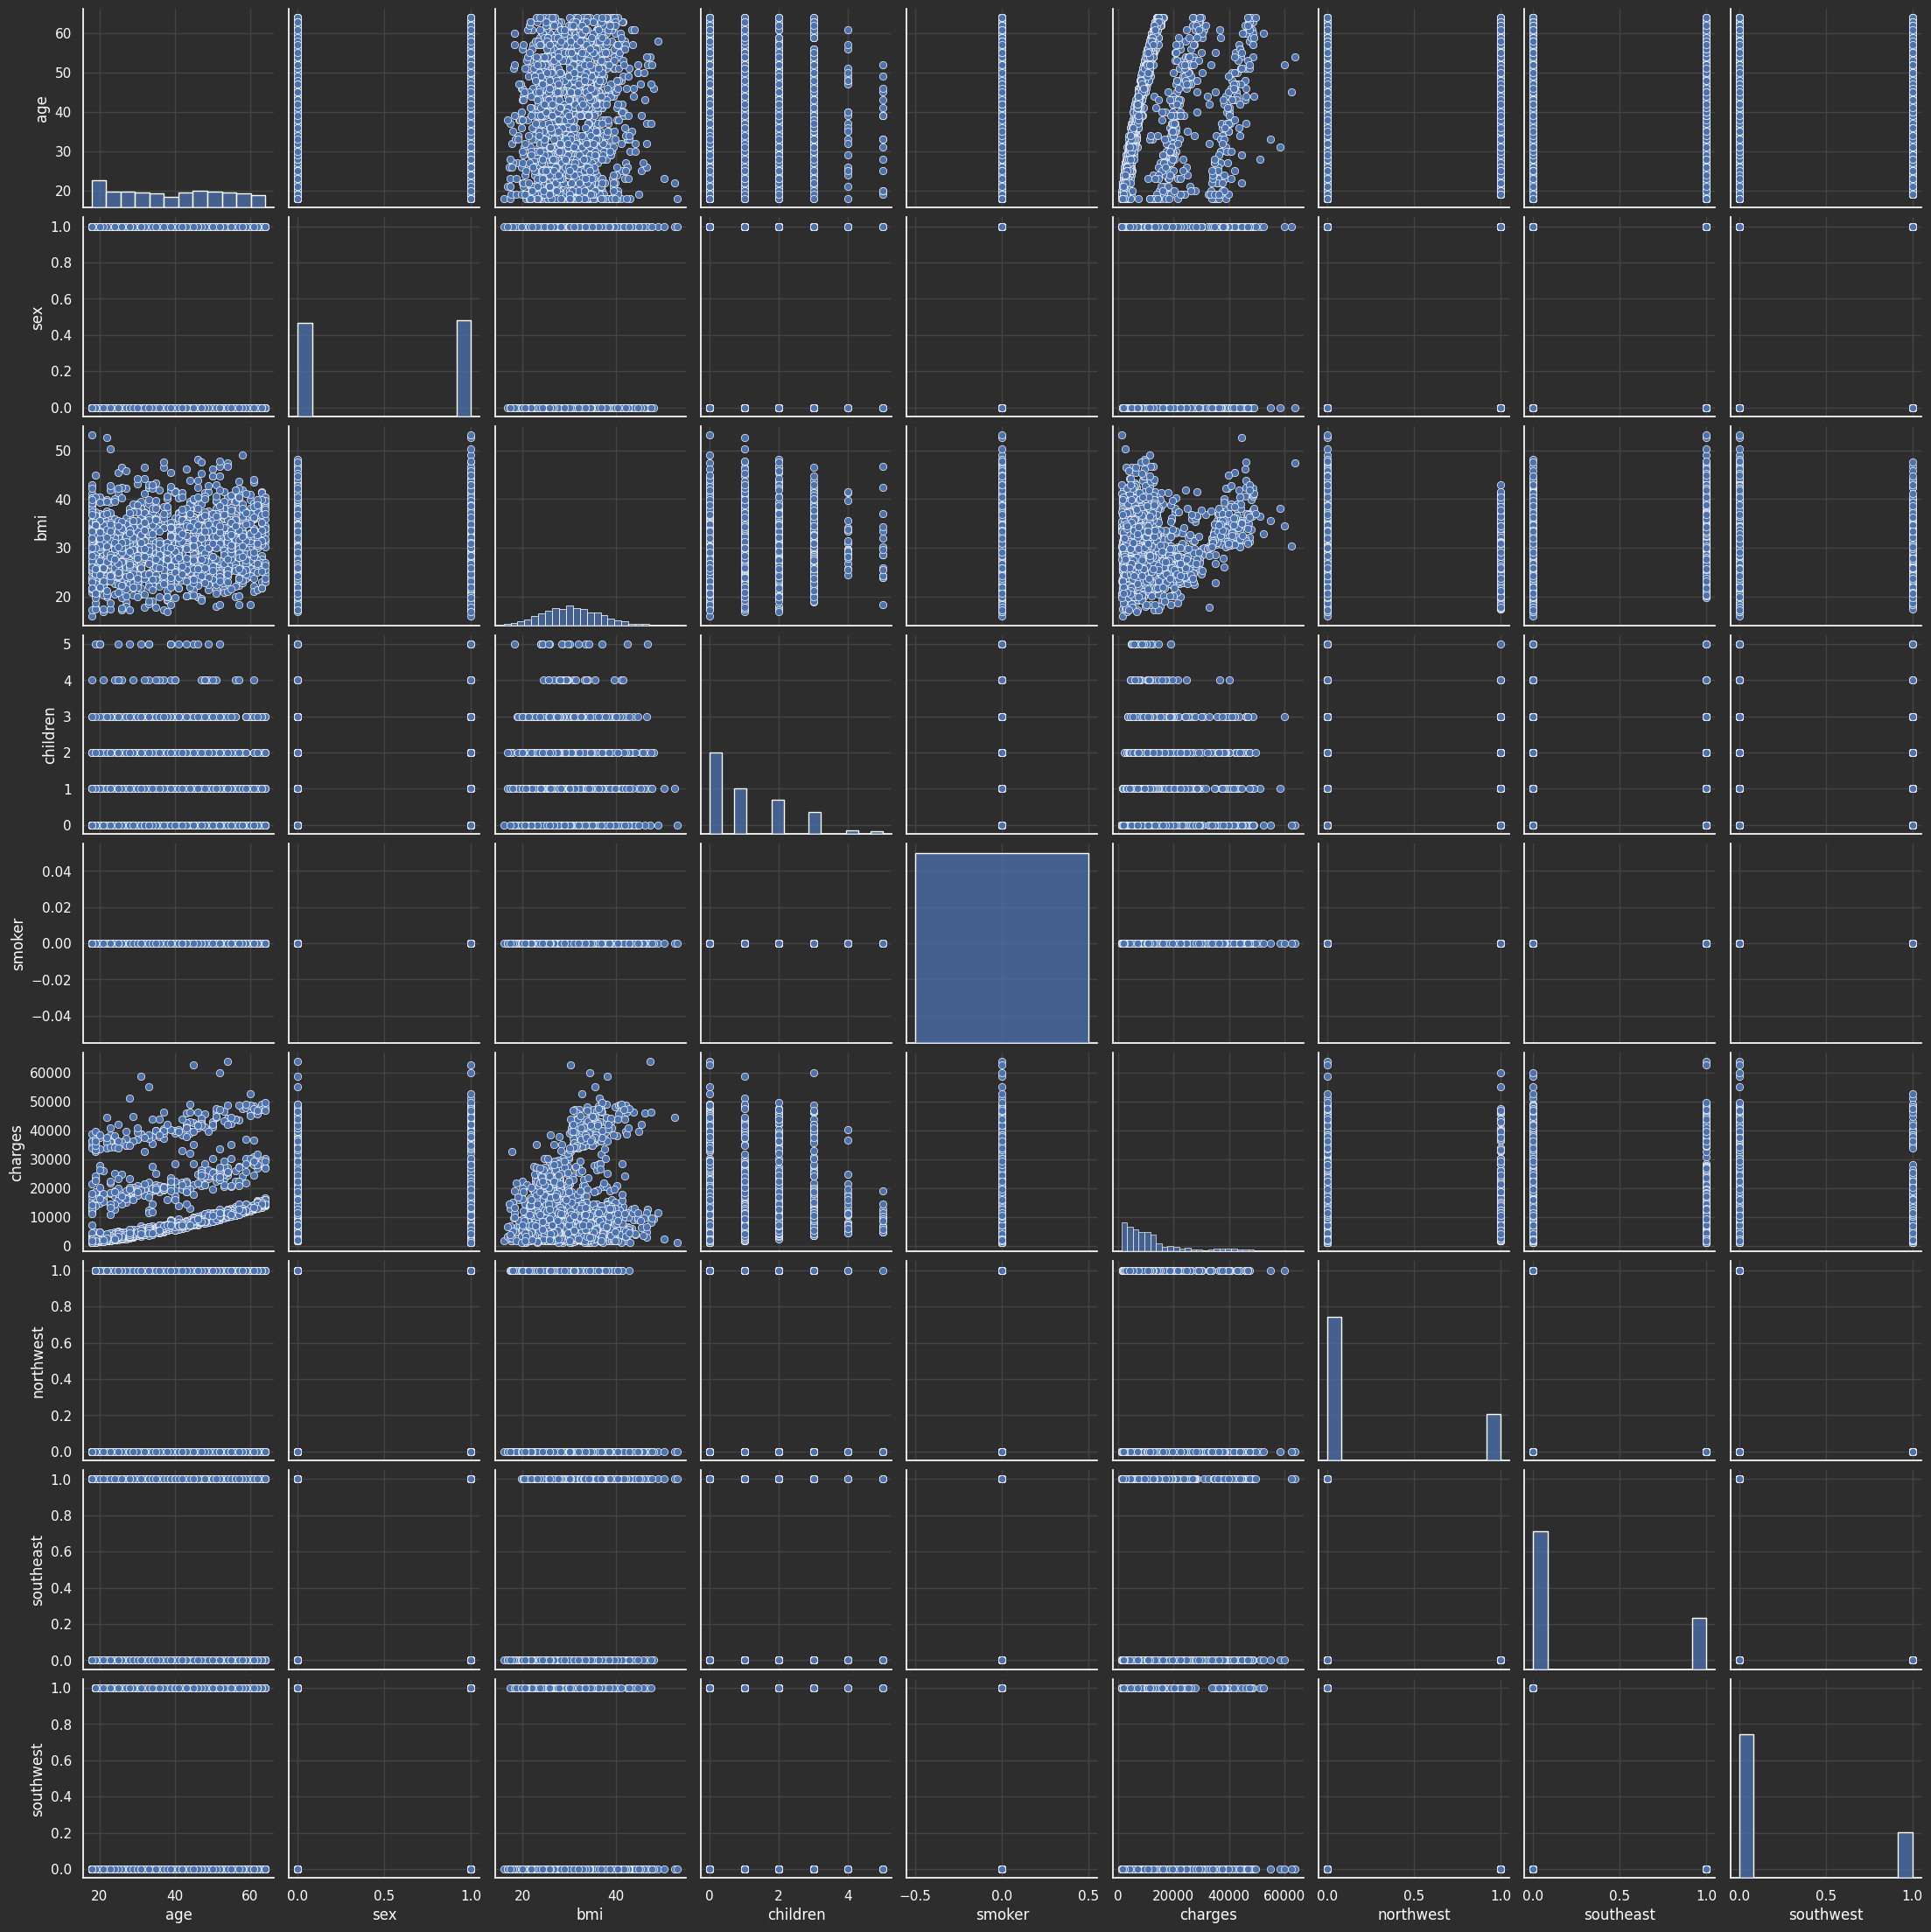

In [28]:
sns.pairplot(insurance_df)

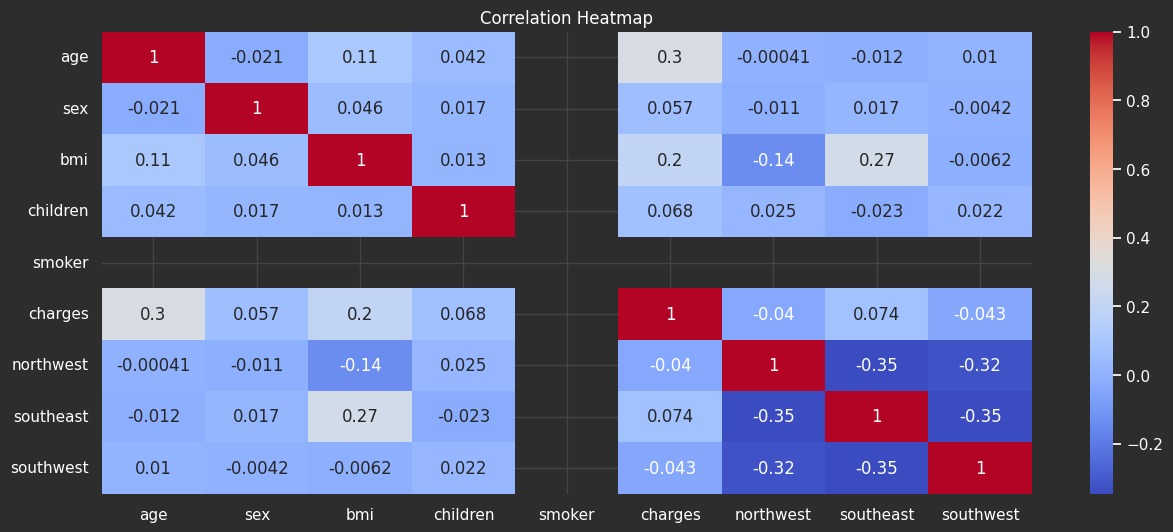

In [29]:
plt.figure(figsize=(15, 6))
sns.heatmap(insurance_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

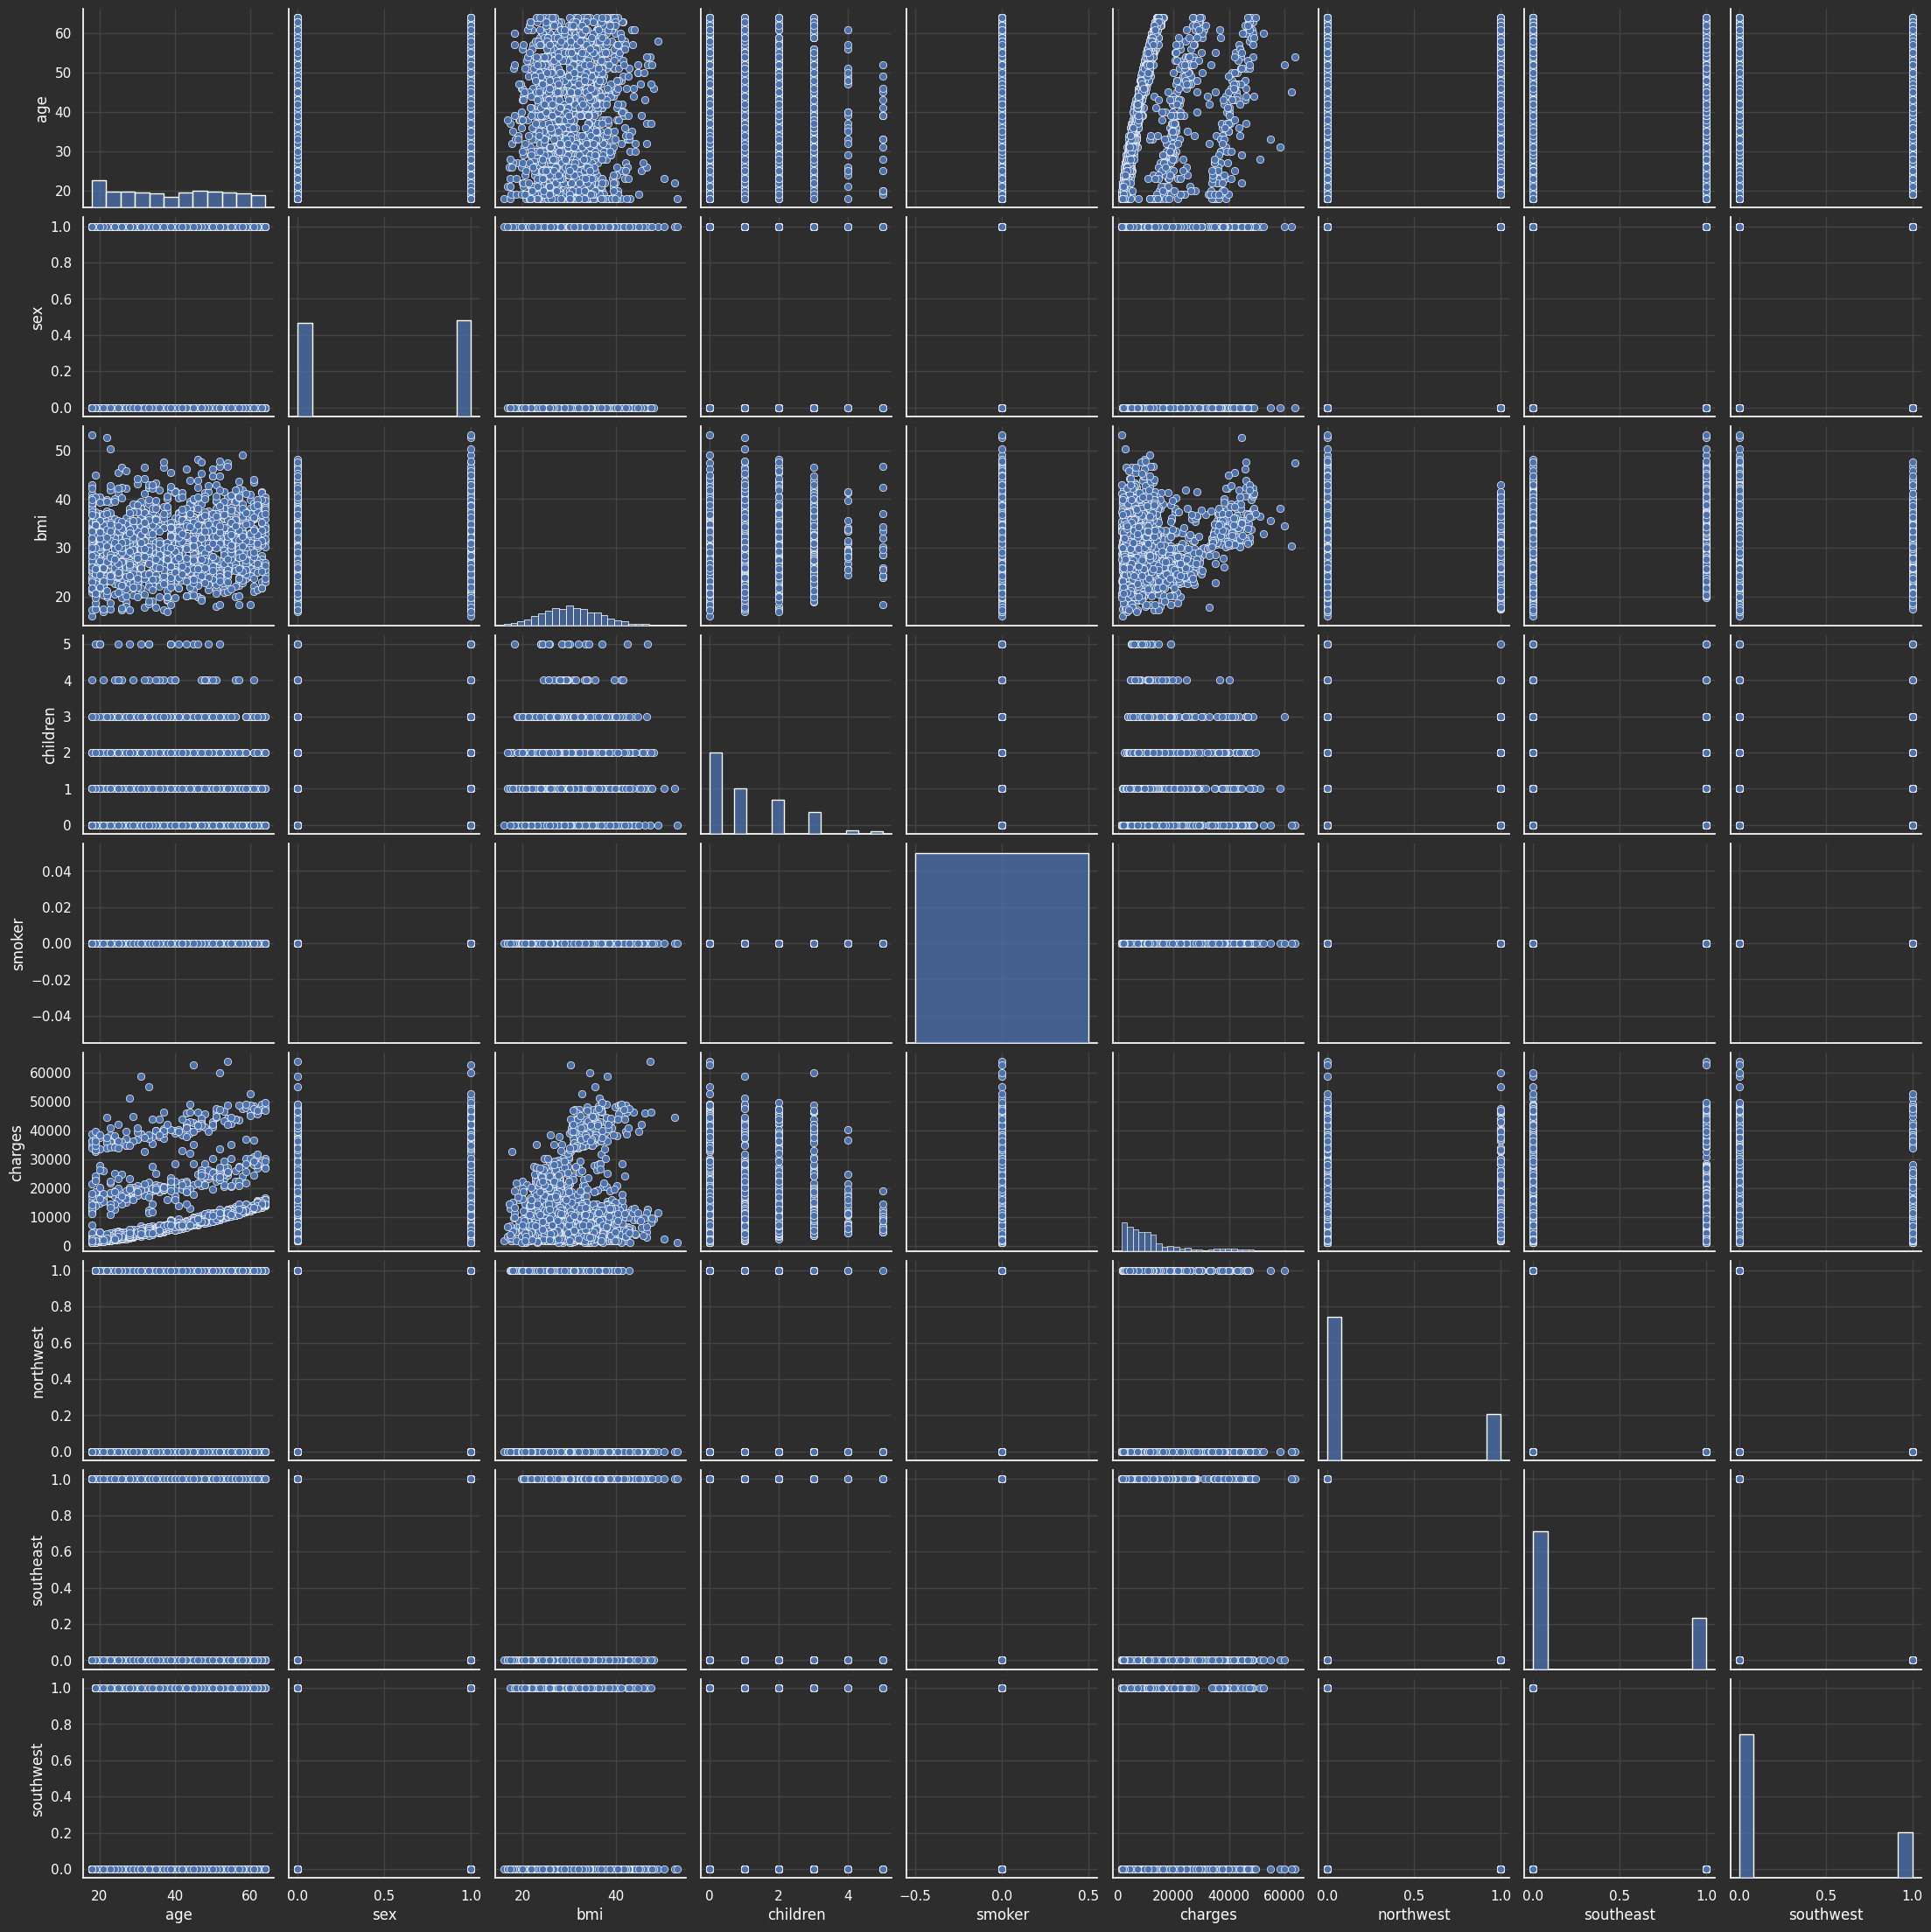

In [30]:
#plot pairplot
sns.pairplot(insurance_df)

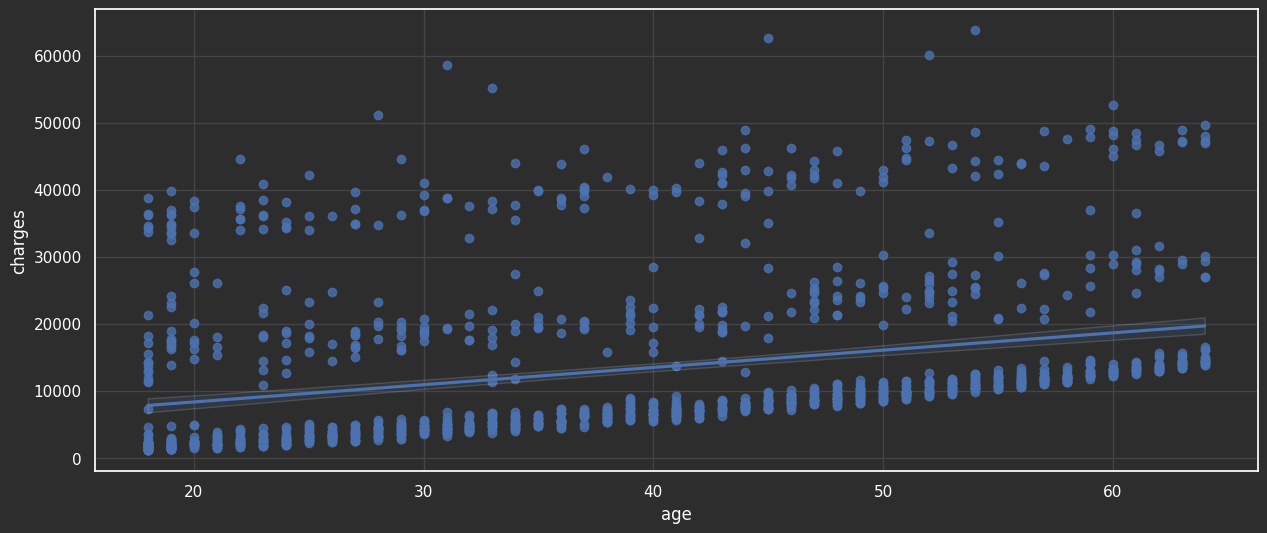

In [31]:
plt.figure(figsize = (15,6) )
sns.regplot(x = 'age' , y = 'charges' , data = insurance_df)
plt.show()

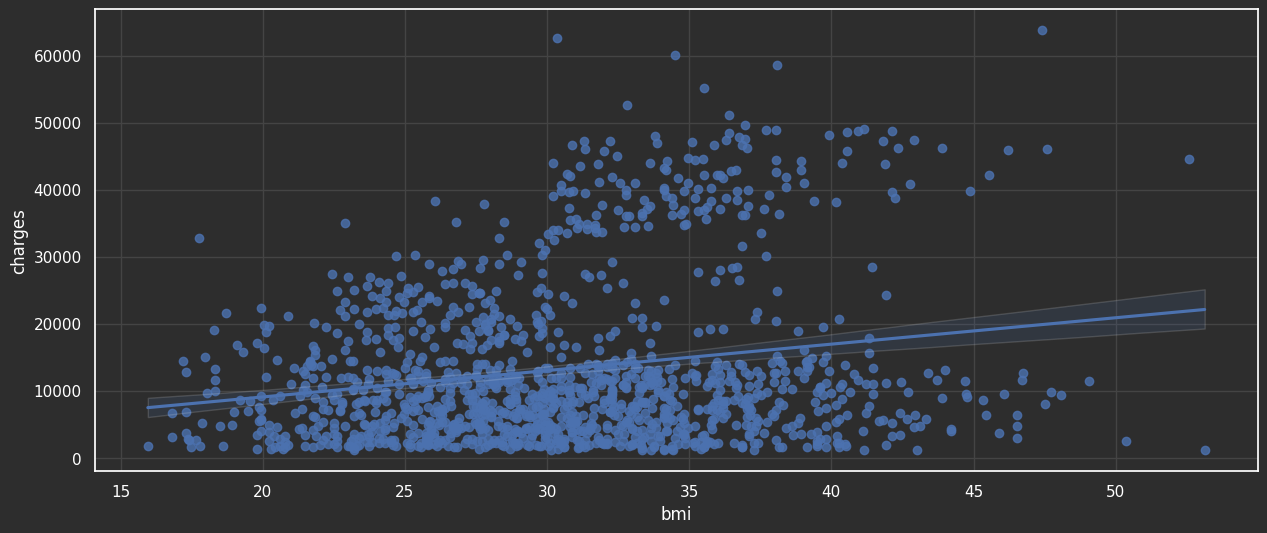

In [32]:
plt.figure(figsize = (15,6) )
sns.regplot(x = 'bmi' , y = 'charges' , data = insurance_df)
plt.show()

Practice Opportunity
* Calculate and plot the correlation matrix
* Which feature has the most positive correlation with charges?


Task 5 : Create Training and Testing Dataset

In [33]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [34]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,NaN,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,NaN,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,NaN,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,NaN,0.067998,0.024806,-0.023066,0.021914
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.299008,0.057292,0.198341,0.067998,NaN,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,NaN,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,NaN,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,NaN,-0.043210,-0.320829,-0.346265,1.000000


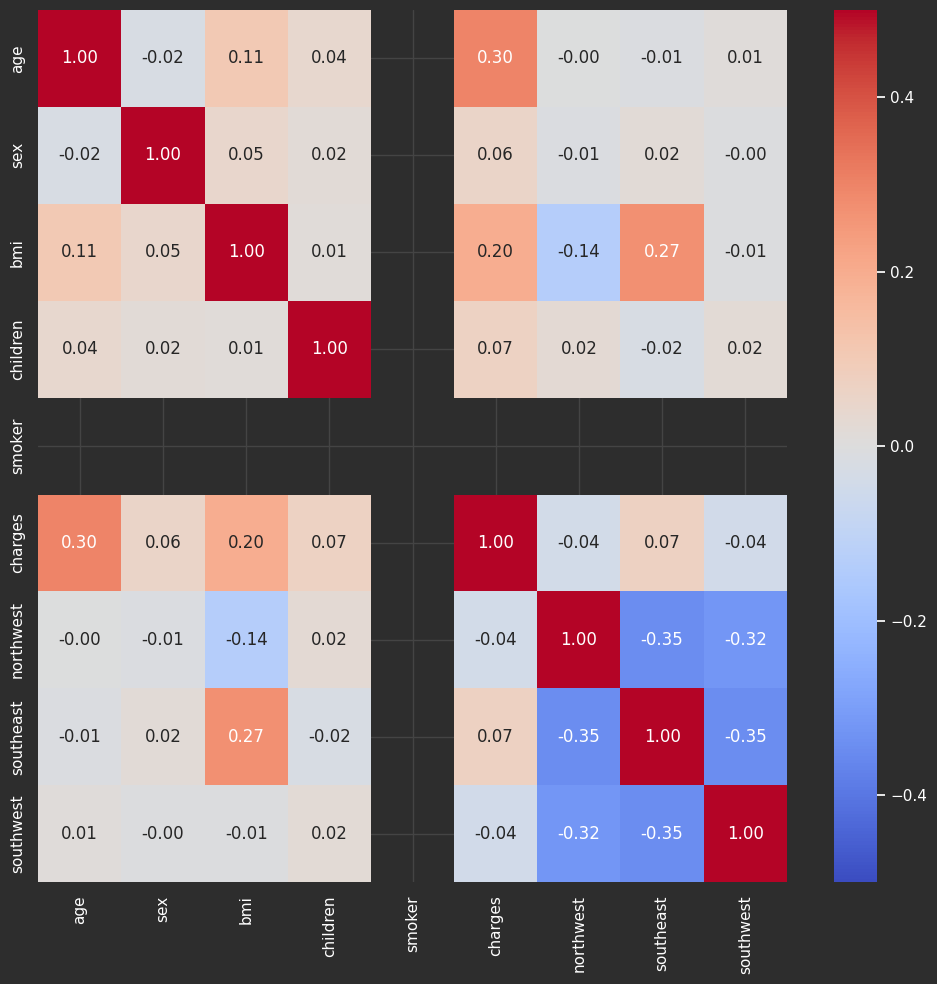

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap with adjusted color range
plt.figure(figsize=(10, 10))
sns.heatmap(insurance_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-0.5, vmax=0.5)  # Narrow the correlation range
plt.tight_layout()
plt.show()


<Axes: >

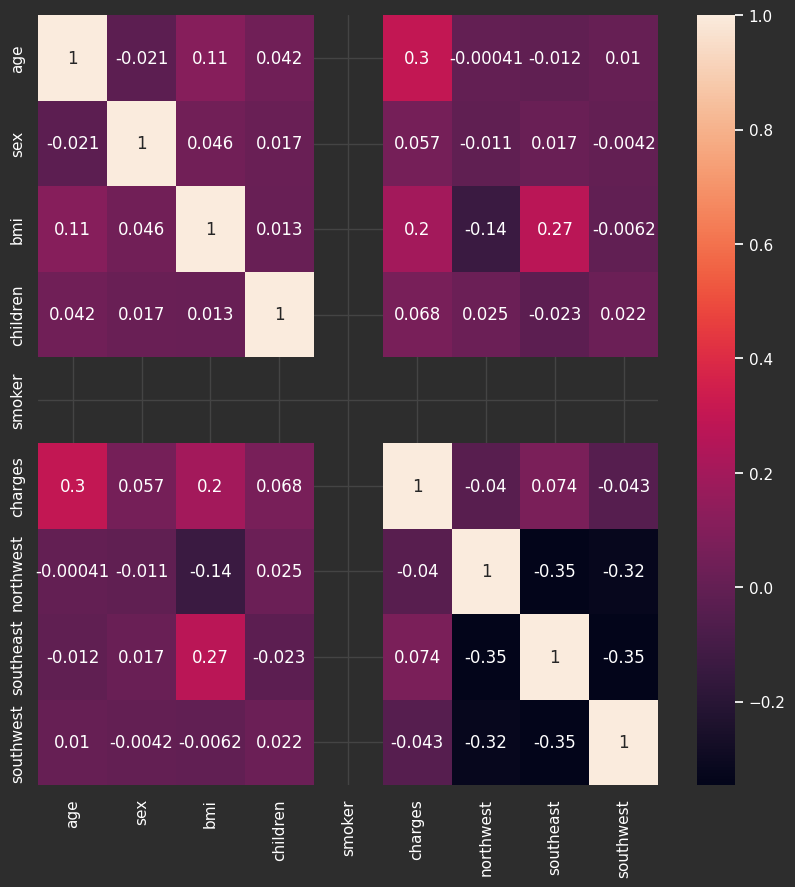

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(insurance_df.corr() , annot = True)

Task 5 Creating Training and Testing Dataset

In [37]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [38]:
X = insurance_df.drop('charges' , axis = 1)
y = insurance_df['charges']


In [39]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,0,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [40]:
X.shape

(1338, 8)

In [41]:
y.shape

(1338,)

In [42]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [43]:
y = y.reshape(-1,1)

In [44]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [45]:
y.shape

(1338, 1)

In [ ]:
#scaling the data before feeding the model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

Practice Opportunity

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape , X_test.shape)

(1070, 8) (268, 8)


Task 6 Train and Evaluate Linear Regression Model in Scikit Learn

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [48]:
regession_model_sklearn = LinearRegression()
regession_model_sklearn.fit(X_train , y_train)

LinearRegression()

In [49]:
regession_model_sklearn_accuracy = regession_model_sklearn.score(X_test , y_test)
regession_model_sklearn_accuracy


0.07471489906311035

In [52]:
y_pred = regession_model_sklearn.predict(X_test)

In [56]:
# Initialize the MinMaxScaler (or use StandardScaler if that fits your case)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler_y = MinMaxScaler()

# Fit the scaler on the training data (y_train)
scaler_y.fit(y_train)

# Assuming that y_pred and y_test are scaled values, we now inverse transform them

# Reshape y_pred and y_test to ensure they are 2D arrays for inverse_transform
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Inverse transform the predictions and test values to original scale
y_predict_orig = scaler_y.inverse_transform(y_pred_reshaped)
y_test_orig = scaler_y.inverse_transform(y_test_reshaped)

# Optionally flatten the results back into 1D arrays if needed
y_predict_orig = y_predict_orig.flatten()
y_test_orig = y_test_orig.flatten()

# Print the original predictions and test values after inverse transforming
print("Original predictions (y_pred):", y_predict_orig)
print("Original test values (y_test):", y_test_orig)

Original predictions (y_pred): [7.25132288e+08 6.10670464e+08 1.24157235e+09 1.03723872e+09
 4.84071968e+08 8.49608704e+08 9.90058240e+08 4.61455392e+08
 8.04026880e+08 6.70546560e+08 4.49272864e+08 5.30358496e+08
 8.21189824e+08 9.34982208e+08 1.04624602e+09 9.26324096e+08
 6.85801920e+08 1.41344806e+09 8.82632768e+08 7.80079488e+08
 9.72845632e+08 5.15000256e+08 3.55102016e+08 7.13362560e+08
 6.06492992e+08 1.06054483e+09 1.03493312e+09 8.61658368e+08
 6.12708160e+08 7.49673280e+08 2.36795392e+08 9.20150016e+08
 9.25307712e+08 8.11252992e+08 9.31831232e+08 1.06024557e+09
 1.16238106e+09 1.09716902e+09 8.75194880e+08 8.36285440e+08
 1.30944640e+09 9.34286464e+08 5.89269696e+08 9.68459776e+08
 7.78337088e+08 7.90790144e+08 7.70571712e+08 9.68665472e+08
 1.04329856e+09 8.97061440e+08 7.96719936e+08 6.87409984e+08
 9.53765376e+08 1.14555264e+09 1.12329088e+09 1.25246950e+09
 1.00352448e+09 7.89382848e+08 7.91081088e+08 9.91276544e+08
 4.19913376e+08 8.77343680e+08 1.03338746e+09 5.478219

In [57]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [58]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig , y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig , y_predict_orig)
MAE = mean_absolute_error(y_test_orig , y_predict_orig)
r2 = r2_score(y_test_orig , y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 713566730.076 
MSE = 5.091774782714675e+17 
MAE = 564636032.0 
R2 = 0.07471483945846558 
Adjusted R2 = 0.046134602839422056


Task 7 Train and Evaluate An Artificial Neural Network Based REgression Model

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Activation , Dropout , BatchNormalization


In [60]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mean_squared_error' , optimizer = 'adam')
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
ANN_model.compile(optimizer= 'Adam' , loss = 'mean_squared_error')
epochs_hist = ANN_model.fit(X_train , y_train , epochs = 100 , batch_size = 20 , validation_split = 0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 339539520.0000 - val_loss: 239631680.0000
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 218330320.0000 - val_loss: 123089808.0000
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135939744.0000 - val_loss: 123374152.0000
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 132673392.0000 - val_loss: 123579656.0000
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112941440.0000 - val_loss: 126777032.0000
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129578304.0000 - val_loss: 129560672.0000
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133111600.0000 - val_loss: 125695664.0000
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 122832056.0000 - val_loss: 127583952.0000
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136821872.0000 - val_loss: 125876648.0000
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121424304.0000 - val_loss: 1318

In [63]:
result = ANN_model.evaluate(X_test , y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119774368.0000
Accuracy : -129804103.0


In [64]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

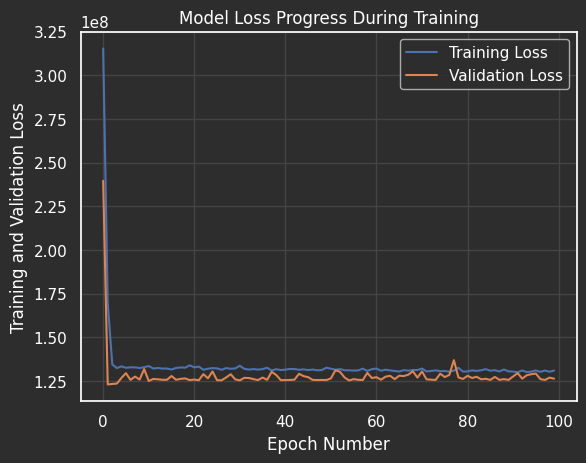

In [65]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0, 0.5, 'True Values')

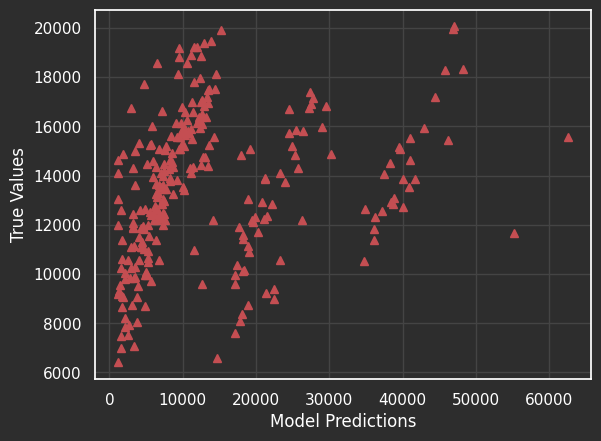

In [66]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test , y_predict ,"^",color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [67]:
y_predict_orig = scaler_y.transform(y_predict)
y_test_orig = scaler_y.transform(y_test)


Text(0, 0.5, 'True Values')

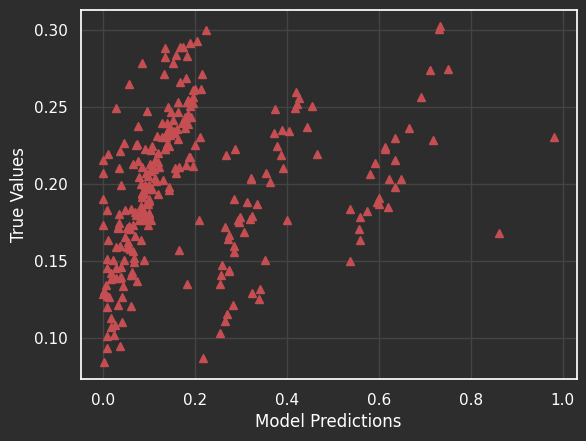

In [68]:
plt.plot(y_test_orig , y_predict_orig ,"^",color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [69]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig , y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig , y_predict_orig)
MAE = mean_absolute_error(y_test_orig , y_predict_orig)
r2 = r2_score(y_test_orig , y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.182 
MSE = 0.033082615584135056 
MAE = 0.14426200091838837 
R2 = 0.07448512315750122 
Adjusted R2 = 0.045897791054258064
